<a href="https://colab.research.google.com/github/alisha0704/CarSalesAnalysis/blob/main/Car_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

<ipython-input-1-059dde546965>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Car_sales.csv to Car_sales.csv


In [4]:
df = pd.read_csv('Car_sales.csv')

df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [5]:
df.isnull().sum()

,0
Manufacturer,0
Model,0
Sales_in_thousands,0
__year_resale_value,36
Vehicle_type,0
Price_in_thousands,2
Engine_size,1
Horsepower,1
Wheelbase,1
Width,1


In [7]:
df.shape

(157, 16)

In [9]:
df.describe()


,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


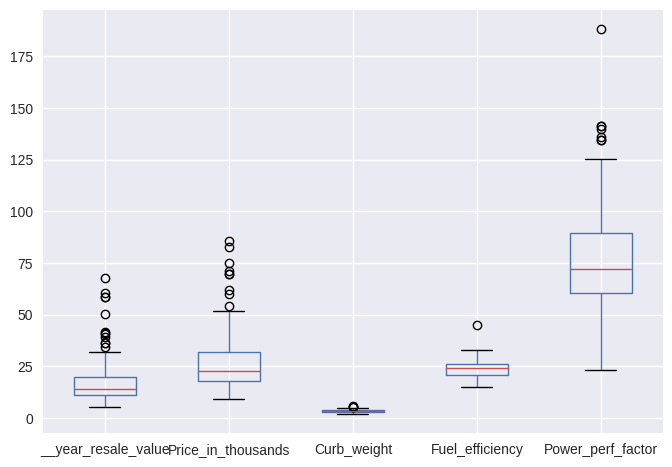

In [10]:
df.boxplot(column=['__year_resale_value', 'Price_in_thousands', 'Curb_weight','Fuel_efficiency','Power_perf_factor'])
plt.show()

In [11]:
# Impute missing values with the mean
df['__year_resale_value'].fillna(df['__year_resale_value'].mean(), inplace=True)
df['Price_in_thousands'].fillna(df['Price_in_thousands'].mean(), inplace=True)
df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].mean(), inplace=True)
df['Curb_weight'].fillna(df['Curb_weight'].mean(), inplace=True)
df['Engine_size'].fillna(df['Power_perf_factor'].mean(), inplace=True)
df['Horsepower'].fillna(df['Fuel_efficiency'].mean(), inplace=True)
df['Wheelbase'].fillna(df['Fuel_efficiency'].mean(), inplace=True)
df['Width'].fillna(df['Fuel_efficiency'].mean(), inplace=True)
df['Length'].fillna(df['Fuel_efficiency'].mean(), inplace=True)
df['Fuel_capacity'].fillna(df['Fuel_efficiency'].mean(), inplace=True)


# Using median with the data that has outliers
df['Power_perf_factor'].fillna(df['Power_perf_factor'].median(), inplace=True)

In [12]:
# Check if any missing values remain
print(df.isnull().sum())


Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


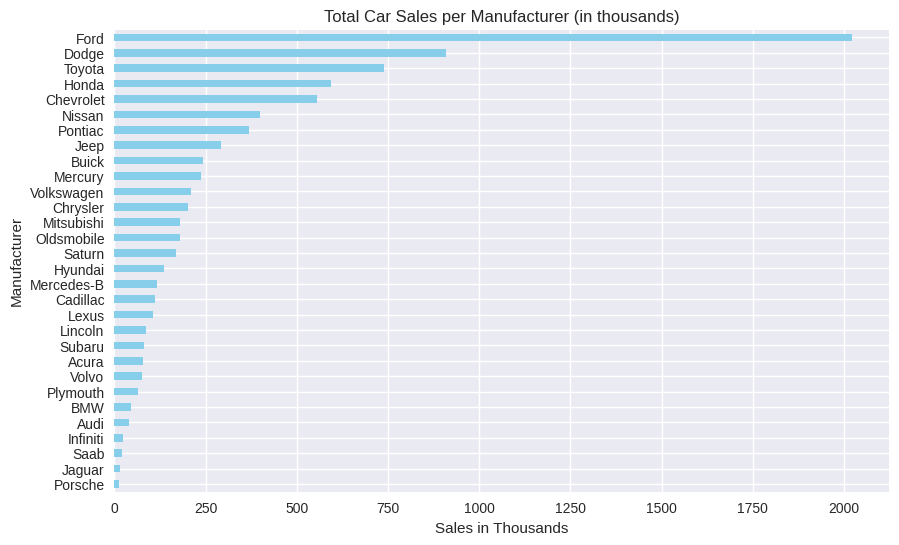

In [15]:
#plotting car sales per manufacturer
# Group by manufacturer and sum the sales
sales_per_manufacturer = df.groupby('Manufacturer')['Sales_in_thousands'].sum().sort_values()

# Plot
plt.figure(figsize=(10,6))
sales_per_manufacturer.plot(kind='barh', color='skyblue')
plt.title('Total Car Sales per Manufacturer (in thousands)')
plt.xlabel('Sales in Thousands')
plt.ylabel('Manufacturer')
plt.show()

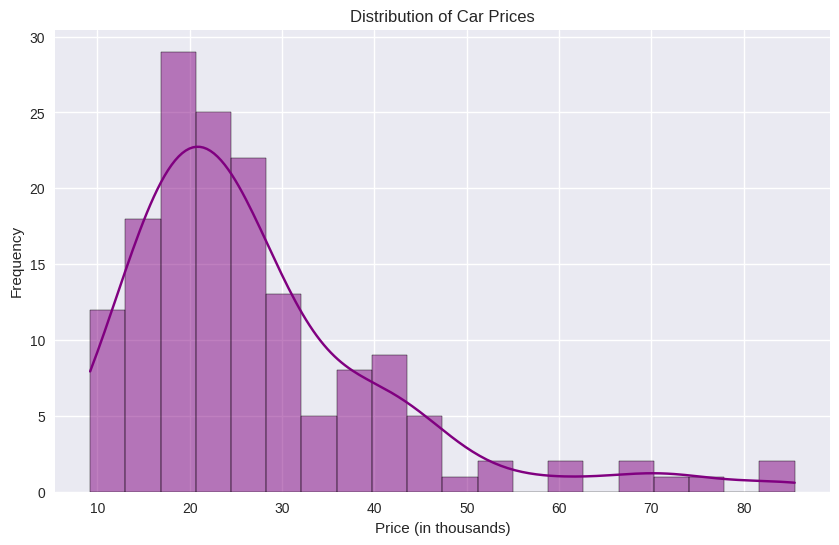

In [18]:
#visualising the distribution of car prices across different models
# Plot a histogram of car prices
plt.figure(figsize=(10,6))
sns.histplot(df['Price_in_thousands'].dropna(), kde=True, color='purple', bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

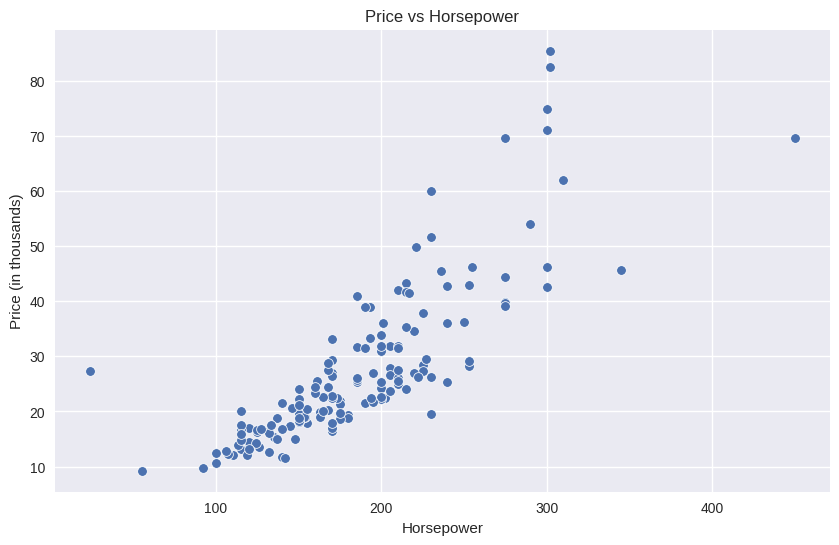

In [19]:
#to analyse how horsepower affects car pricing
# Scatter plot of Price vs Horsepower
plt.figure(figsize=(10,6))
sns.scatterplot(x='Horsepower', y='Price_in_thousands', data=df)
plt.title('Price vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price (in thousands)')
plt.show()


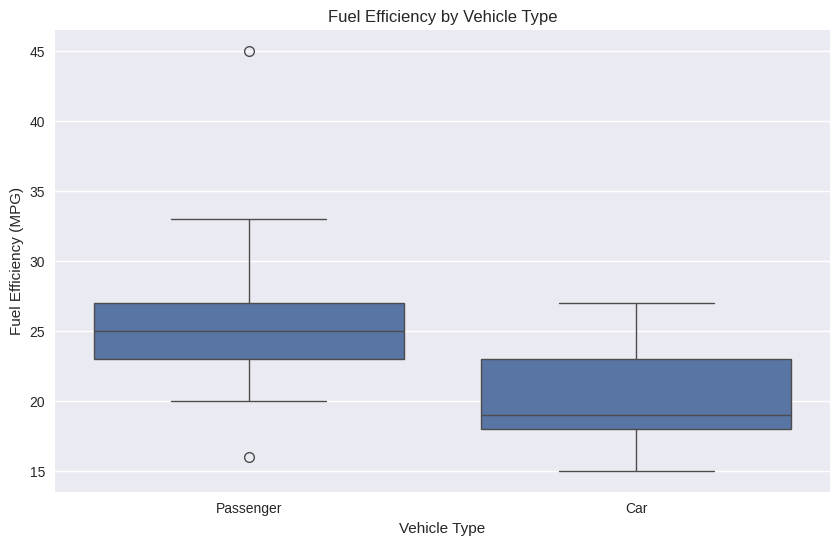

In [20]:
# Boxplot of fuel efficiency segmented by vehicle type
plt.figure(figsize=(10,6))
sns.boxplot(x='Vehicle_type', y='Fuel_efficiency', data=df)
plt.title('Fuel Efficiency by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Fuel Efficiency (MPG)')
plt.show()


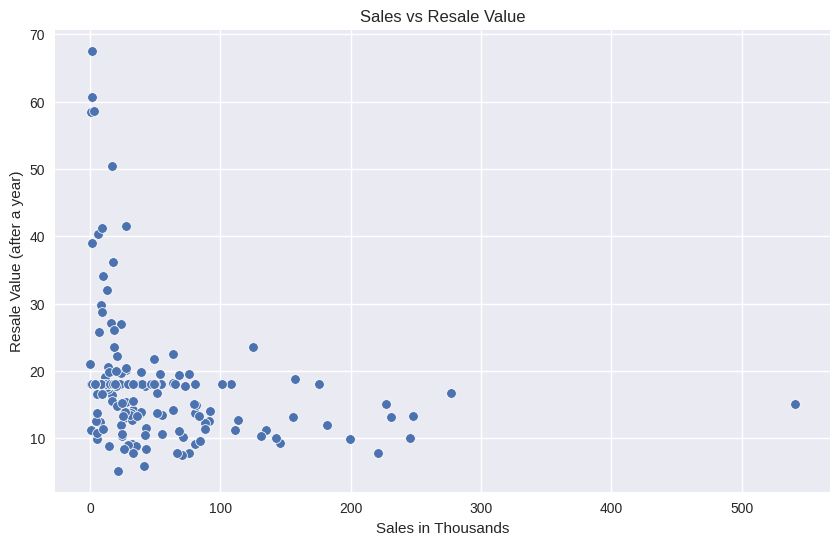

In [21]:
# Scatter plot of Sales vs Resale Value
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales_in_thousands', y='__year_resale_value', data=df)
plt.title('Sales vs Resale Value')
plt.xlabel('Sales in Thousands')
plt.ylabel('Resale Value (after a year)')
plt.show()